/tmp/ipykernel_4485/1456606535.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Start'] = pd.to_datetime(cleaned_data['Start'], errors='coerce')
/tmp/ipykernel_4485/1456606535.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['End'] = pd.to_datetime(cleaned_data['End'], errors='coerce')
/tmp/ipykernel_4485/1456606535.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

<Figure size 1000x600 with 0 Axes>

/home/habte/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/habte/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


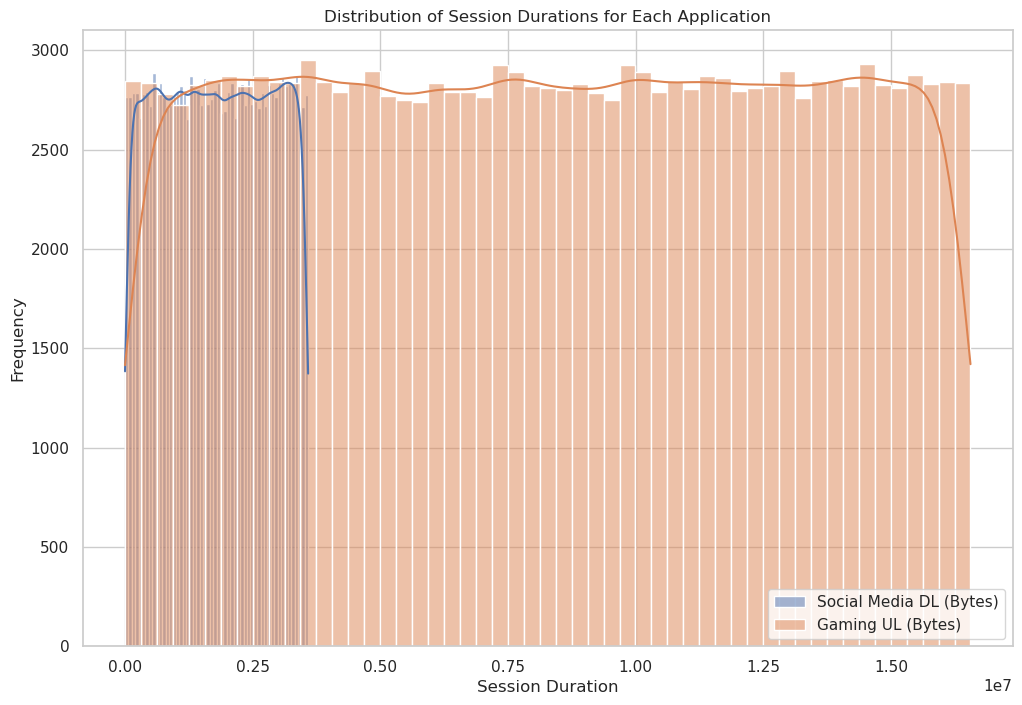

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

class UserOverviewAnalysis:
    def __init__(self, mydata):
        self.mydata = mydata

    def clean_and_preprocess(self):
        # Use .loc to avoid SettingWithCopyWarning
        cleaned_data = self.mydata.dropna()
        cleaned_data['Start'] = pd.to_datetime(cleaned_data['Start'], errors='coerce')
        cleaned_data['End'] = pd.to_datetime(cleaned_data['End'], errors='coerce')
        numeric_columns = cleaned_data.select_dtypes(include='number').columns
        cleaned_data.loc[:, numeric_columns] = cleaned_data.loc[:, numeric_columns].fillna(cleaned_data[numeric_columns].mean())
        return cleaned_data

    def visualize_results(self):
        sns.set_theme(style="whitegrid")
        plt.figure(figsize=(10, 6))
        # Placeholder plotting logic
        # Implement your visualization logic
        plt.show()

    def aggregate_user_behaviour(self):
        # Assuming 'UserID' is the correct identifier for aggregation
        user_device_mapping = self.mydata.groupby(['IMSI', 'MSISDN/Number'])['IMEI'].unique()
        aggregated_data = self.mydata.groupby('Bearer Id').sum()  
        return aggregated_data

    def top_10_handsets(self):
        top_10_handsets = self.mydata['IMEI'].value_counts().nlargest(10)
        return top_10_handsets

    def top_3_manufacturers(self):
        cleaned_data = self.clean_and_preprocess()  # Use cleaned_data for consistency
        cleaned_data['IMEI'] = cleaned_data['IMEI'].astype(str)
        cleaned_data['Manufacturer'] = cleaned_data['IMEI'].str[:8]
        top_3_manufacturers = cleaned_data['Manufacturer'].value_counts().nlargest(3)
        return top_3_manufacturers

    def top_5_handsets_per_manufacturer(self):
        cleaned_data = self.clean_and_preprocess()  # Use cleaned_data for consistency
        cleaned_data['IMEI'] = cleaned_data['IMEI'].astype(str)
        cleaned_data['Manufacturer'] = cleaned_data['IMEI'].str[:8]
        top_manufacturers = cleaned_data['Manufacturer'].value_counts().nlargest(3).index

        combined_top_handsets = pd.DataFrame()

        for manufacturer in top_manufacturers:
            manufacturer_data = cleaned_data[cleaned_data['Manufacturer'] == manufacturer]
            top_handsets = manufacturer_data['IMEI'].value_counts().nlargest(5).reset_index()
            top_handsets.columns = ['IMEI', f'Top 5 Handsets for {manufacturer}']
            combined_top_handsets = pd.concat([combined_top_handsets, top_handsets], axis=1)

        return combined_top_handsets

    def data_analysis(self):
        applications = ['Social Media DL (Bytes)', 'Gaming UL (Bytes)']
        plt.figure(figsize=(12, 8))
        for app in applications:
            sns.histplot(self.mydata[self.mydata[app] > 0][app], label=app, kde=True)

        plt.title('Distribution of Session Durations for Each Application')
        plt.xlabel('Session Duration')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

# Database connection parameters
db_params = {
    'dbname': 'week1',
    'user': 'postgres',
    'password': 'habte',
    'host': 'localhost',
    'port': '5432'
}

engine = create_engine(f'postgresql+psycopg2://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}:{db_params["port"]}/{db_params["dbname"]}')

sql_query = "SELECT * FROM xdr_data;"
mydata = pd.read_sql_query(sql_query, engine)

user_analysis = UserOverviewAnalysis(mydata)
cleaned_data = user_analysis.clean_and_preprocess()
aggregated_data = user_analysis.aggregate_user_behaviour()
top_10_handsets = user_analysis.top_10_handsets()
top_3_manufacturers = user_analysis.top_3_manufacturers()
top_5_handsets_per_manufacturer = user_analysis.top_5_handsets_per_manufacturer()
user_analysis.visualize_results()
user_analysis.data_analysis()
